### 상관 관계 탐색
- 영화의 장르간 상관 관계를 파악하라. (Heatmap, pivot)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 설정 (맑은 고딕)
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
movies = pd.read_csv('kmrd-small/movies.txt', sep="\t", engine='python')
countries = pd.read_csv('kmrd-small/countries.csv')
castings = pd.read_csv('kmrd-small/castings.csv')
users = pd.read_csv('kmrd-small/rates.csv')
peoples = pd.read_csv('kmrd-small/peoples.txt', sep="\t", engine='python')
genres = pd.read_csv('kmrd-small/genres.csv')


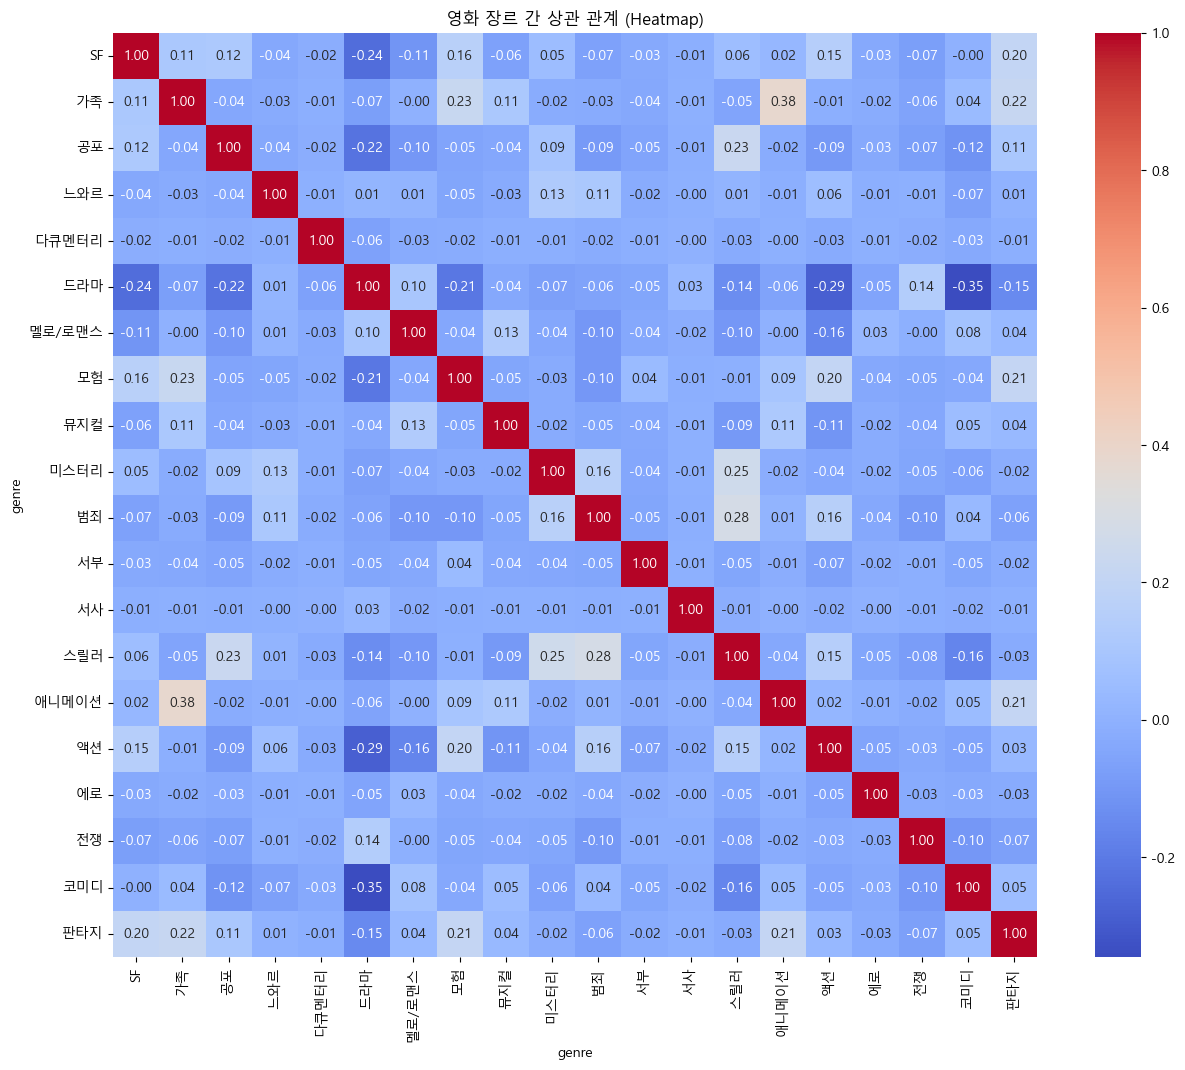

In [3]:
# 1. 장르별 영화 관계 테이블 생성
# 영화별 장르 리스트를 이진화 처리
genre_pivot = genres.pivot_table(index='movie', columns='genre', aggfunc='size', fill_value=0)

# 2. 장르 간 상관 관계 계산
genre_correlation = genre_pivot.corr()

# 3. Heatmap 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(genre_correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("영화 장르 간 상관 관계 (Heatmap)")
plt.show()


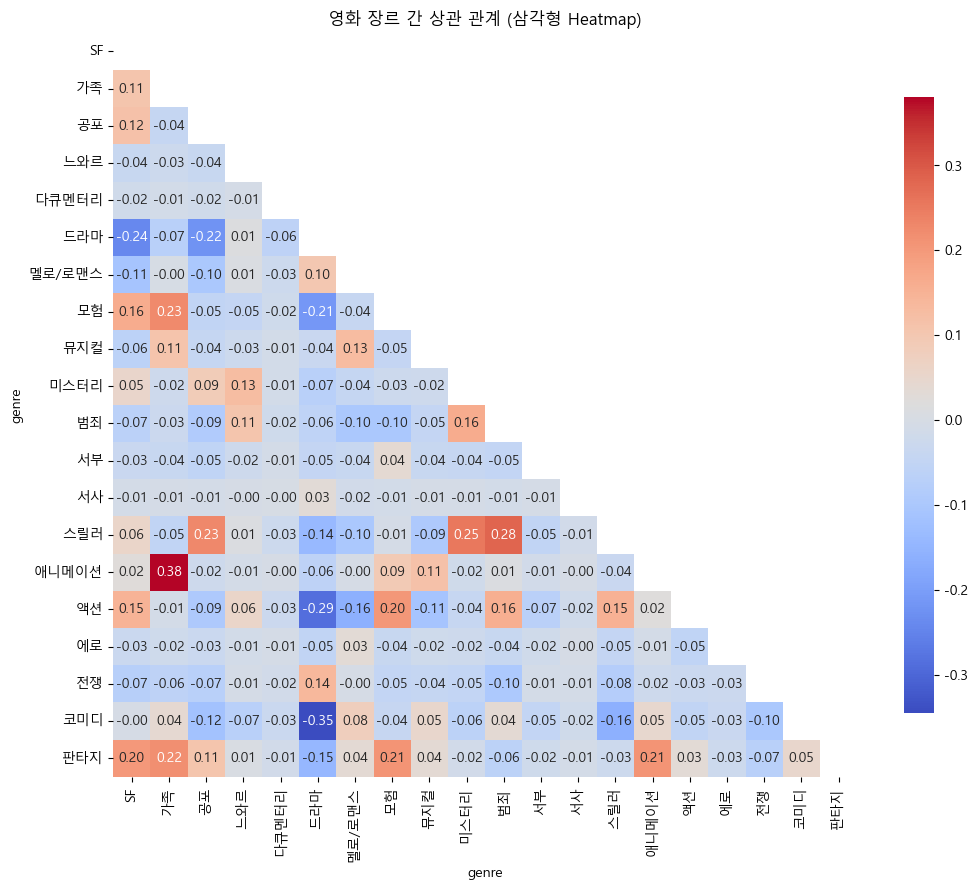

In [4]:
# 1. 장르별 영화 관계 테이블 생성
genre_pivot = genres.pivot_table(index='movie', columns='genre', aggfunc='size', fill_value=0)

# 2. 장르 간 상관 관계 계산
genre_correlation = genre_pivot.corr()

# 3. 상관 관계 행렬에서 삼각형 마스크 생성
mask = np.triu(np.ones_like(genre_correlation, dtype=bool))

# np.triu는 Numpy에서 제공하는 함수로, 배열(행렬)의 상삼각형 부분만 남기고 나머지 부분(하삼각형)을 0으로 설정하는 역할을 함.
# np.triu는 상삼각형을 True로 설정하고, 나머지 부분(하삼각형)을 False로 마스킹 처리.
# 하지만, Heatmap에서는 이 마스킹 결과를 반대로 적용. 즉, 상삼각형을 숨기고 하삼각형만 표시 = 결과값값.

# 4. 삼각형 Heatmap 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(
    genre_correlation, 
    mask=mask,  # 대칭 데이터를 제거
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("영화 장르 간 상관 관계 (삼각형 Heatmap)")
plt.show()
